# ML Course 2 - Practice

## Subject

We provide here a data set on the customers of a bank:
- CustomerId = customer id in the information system of the bank
- Surname = surname of the customer
- CreditScore = score attributed by the bank as estimation of capacity to reimburse a loan
- Geography = country of the customer
- Gender = sex of the customer
- Age = age of the customer
- Tenure = loan duration (year)
- Balance = amount of money on main account (\$)
- NumOfProducts = number of products the customer has in the banl
- HasCrCard = tells if the customer owns a credit card
- IsActiveMember = tells if the customer has an active account
- EstimatedSalary = estimated salary of the customer (\$)
- Exited = tells if the customer has left the bank

In [407]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [408]:
dataset_raw = pd.read_csv('bank_churn.csv')
dataset_raw.sample(n=10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2166,2167,15780650,Biryukov,667,France,Male,40,9,0.00,1,1,1,96670.20,0
6265,6266,15624471,Chikwado,850,France,Male,37,6,0.00,2,1,0,109291.22,0
4540,4541,15613017,McMillan,586,Germany,Male,32,1,149814.54,1,1,0,31830.06,0
9458,9459,15665064,Harvey,523,France,Male,36,8,158351.02,2,1,0,155304.53,0
1128,1129,15750258,Ann,675,France,Female,32,2,155663.31,1,1,0,97658.66,0
8912,8913,15637354,Yobachukwu,623,France,Female,24,7,148167.83,2,1,1,109470.34,0
5799,5800,15649853,Craig,625,France,Female,45,3,0.00,1,1,1,184474.15,1
9629,9630,15601977,Burgoyne,497,Spain,Male,44,2,121250.04,1,0,1,79691.40,0
8975,8976,15763415,Gray,567,Germany,Male,41,0,134378.89,1,1,1,105746.94,0
5915,5916,15725665,Lo,679,France,Male,47,10,198546.10,2,1,0,191198.92,1


The objective of the bank is to predict the churn, i.e. if a customer is likely to leave the bank, based on his/her profile (estimated salary, geography, age, etc.).
Here, we will prepare the data set so that it can be directly used for ML processing. The work is limited to data exploration and preparation, we will not make ML prediction yet.

Your tasks:
- Make some data exploration with at least three plots of your choice. Choose plots that provide interesting and meaningful information. 
Examples: distribution of the values within one feature, repartition of a feature depending on the target value, etc.  
For each graph, you must:
    - Plot the graph
    - Povide a title, axis labels and legend if applicable
    - Write a Markdown cell underneath to explain what insights you can draw from your graph. 
- Prepare the data set. Example: dropping irrelevant data, preparing the predictors and the response, data encoding, train/test split, data scaling.
    - Explain why you drop a features
    - Explain your choice of encoding
   
Bonus: Feature Engineering!  
Enrich the dataset by creating new features for your model to learn on. It can be a combination of other features or combining with external information.

****Bonus part can contain calculated column from other columns, just need to make sense.**

In [409]:
# it is better to check the data first
dataset_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [410]:
# check for duplicated values
dataset_raw.duplicated().sum()

0

In [411]:
# check for null values
dataset_raw.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

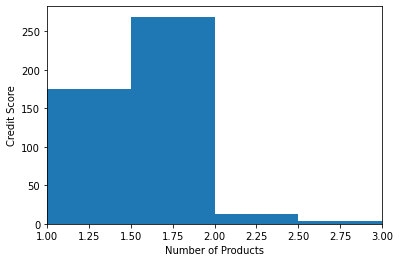

In [412]:
# check if there's a relation on NumOfProducts and CreditScore
dataset_raw['NumOfProducts'].groupby(dataset_raw['CreditScore']).mean().plot(kind='hist', bins=4)
plt.xlabel('Number of Products')
plt.xlim((1, 3))
plt.ylabel('Credit Score')
plt.show()


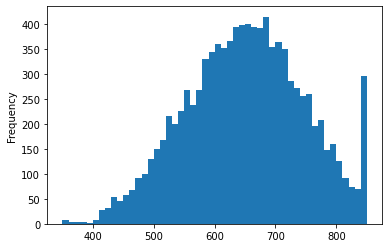

In [413]:
# check for the general distribution of the data
dataset_raw['CreditScore'].plot(kind='hist', bins=50)
plt.show()

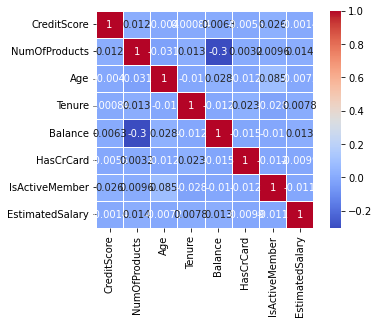

In [414]:
# check for a general correlation heatmap between the variables to see if there is any relationship between
dataset_raw_sns = dataset_raw[['CreditScore', 'NumOfProducts', 'Age', 'Tenure', 'Balance', 'HasCrCard',
                               'IsActiveMember', 'EstimatedSalary']].corr()
sns.heatmap(dataset_raw_sns, annot=True, linewidths=0.5, vmax=1.0, square=True, cmap='coolwarm')
plt.show()

In [415]:
# left with an error output by purpose to see encoding is needed
# dataset_raw.groupby('CreditScore')['Geography'].mean().plot(kind='bar')

## Variable Encoding

In [416]:
# better to encode the data before starting to work
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()

dataset_raw2 = dataset_raw.copy()
dataset_raw2['Gender'] = label_encoder.fit_transform(dataset_raw['Gender'])
dataset_raw2.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2956,2957,15642885,Gray,792,France,1,30,8,0.00,2,1,0,199644.20,0
682,683,15775238,Achebe,651,Germany,0,41,4,133432.59,1,0,1,151303.48,0
7873,7874,15750441,Lavarack,782,France,1,36,5,81210.72,2,0,1,108003.38,0
8609,8610,15774258,Gorbunov,678,France,1,40,1,0.00,2,1,1,187343.40,0
6817,6818,15593128,Vinogradoff,608,France,0,56,10,129255.20,2,1,0,142492.04,1
6226,6227,15792305,Mountgarrett,762,Germany,1,46,6,123571.77,3,0,1,57014.17,1
7784,7785,15756299,Davis,741,France,0,64,2,69311.16,1,1,1,59237.72,0
9414,9415,15632280,Toth,544,Spain,0,53,9,0.00,1,1,0,125692.07,1
8467,8468,15667456,Ross,709,Spain,1,62,3,0.00,2,1,1,82195.15,0
5062,5063,15650432,Liu,849,Germany,1,41,10,84622.13,1,1,1,198072.16,0


In [417]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

oh_encoder = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['Geography'])], 
                               remainder='passthrough')
X_onehot = oh_encoder.fit_transform(dataset_raw2)
print(X_onehot[:6])

[[1.0 0.0 0.0 1 15634602 'Hargrave' 619 0 42 2 0.0 1 1 1 101348.88 1]
 [0.0 0.0 1.0 2 15647311 'Hill' 608 0 41 1 83807.86 1 0 1 112542.58 0]
 [1.0 0.0 0.0 3 15619304 'Onio' 502 0 42 8 159660.8 3 1 0 113931.57 1]
 [1.0 0.0 0.0 4 15701354 'Boni' 699 0 39 1 0.0 2 0 0 93826.63 0]
 [0.0 0.0 1.0 5 15737888 'Mitchell' 850 0 43 2 125510.82 1 1 1 79084.1 0]
 [0.0 0.0 1.0 6 15574012 'Chu' 645 1 44 8 113755.78 2 1 0 149756.71 1]]


In [418]:
# checks the category names
oh_encoder.named_transformers_['encoder'].categories_

[array(['France', 'Germany', 'Spain'], dtype=object)]

In [419]:
# convert the dummy data into dummy/indicator variables
dataset_raw2 = pd.get_dummies(dataset_raw2, columns=['Geography'], prefix=['Geo_'])
dataset_raw2 = pd.get_dummies(dataset_raw2, columns=['Gender'], prefix=['Gender_'])

In [420]:
dataset_raw2.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo__France,Geo__Germany,Geo__Spain,Gender__0,Gender__1
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


## Column Drop

In [421]:
# We can drop 'Exited' and 'Surname' columns since we're searching for the churn probability,
# not the customers exited already
try:
    dataset_raw2.drop('Exited', axis=1, inplace=True)
    dataset_raw2.drop('Surname', axis=1, inplace=True)
except KeyError as e:
    pass

dataset_raw2.sample(n=10)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo__France,Geo__Germany,Geo__Spain,Gender__0,Gender__1
4401,4402,15689633,845,38,2,112803.92,1,1,0,179631.85,0,0,1,1,0
1376,1377,15587233,457,41,8,73700.12,3,1,1,185750.02,1,0,0,0,1
2405,2406,15759021,685,35,9,0.00,1,1,0,167033.83,1,0,0,0,1
3251,3252,15750335,850,43,0,108508.82,3,1,0,184044.80,0,1,0,0,1
5453,5454,15643819,714,25,4,0.00,2,0,0,82500.84,1,0,0,1,0
9787,9788,15752626,553,32,7,64082.09,1,0,1,109159.58,1,0,0,0,1
2916,2917,15704583,651,56,2,0.00,1,1,0,114522.68,1,0,0,0,1
7980,7981,15627517,497,27,7,149400.27,1,0,0,167522.19,0,0,1,0,1
4085,4086,15627251,520,34,4,134007.90,1,1,1,193209.11,1,0,0,0,1
1628,1629,15810347,662,30,9,0.00,2,0,1,157884.83,0,0,1,1,0


## Column Addition

In [422]:
# add churn column with null values to be prepared for training part
dataset_raw2['Churn'] = np.nan
dataset_raw2.sample(n=10)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo__France,Geo__Germany,Geo__Spain,Gender__0,Gender__1,Churn
2533,2534,15631838,606,61,5,108166.09,2,0,1,8643.21,1,0,0,0,1,NaN
8869,8870,15733597,669,41,0,150219.41,2,0,0,107839.03,1,0,0,1,0,NaN
8797,8798,15630466,797,45,8,0.00,1,0,0,125110.02,1,0,0,0,1,NaN
1234,1235,15684865,771,66,7,143773.07,1,1,1,130827.88,1,0,0,1,0,NaN
9769,9770,15703707,656,44,10,143571.52,1,0,0,127444.14,1,0,0,0,1,NaN
7516,7517,15748649,644,40,8,93183.19,1,1,0,73882.49,1,0,0,0,1,NaN
1313,1314,15576602,809,38,3,0.00,2,1,1,80061.31,1,0,0,0,1,NaN
7424,7425,15625501,570,38,1,127201.58,1,1,0,147168.28,0,1,0,0,1,NaN
1404,1405,15797276,662,41,4,90350.77,1,1,0,75884.65,0,0,1,1,0,NaN
4447,4448,15716381,666,50,7,109062.28,1,1,1,140136.10,0,1,0,1,0,NaN


## Extra Column

In [423]:
# an extra column that can be useful for an other user score
dataset_raw2['calculatedScore'] = (dataset_raw2['CreditScore'] * dataset_raw2['Age']) / 1000
dataset_raw2.sample(n=10)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo__France,Geo__Germany,Geo__Spain,Gender__0,Gender__1,Churn,calculatedScore
2725,2726,15597951,471,58,4,114713.57,1,1,1,36315.03,1,0,0,1,0,NaN,27.318
7150,7151,15691150,699,32,4,110559.46,1,1,1,127429.56,1,0,0,1,0,NaN,22.368
4041,4042,15742504,593,36,2,70181.48,2,1,0,80608.12,1,0,0,0,1,NaN,21.348
6919,6920,15599084,782,33,7,191523.09,1,1,1,167058.75,1,0,0,0,1,NaN,25.806
3260,3261,15768072,688,33,2,0.00,1,0,0,27557.18,0,0,1,1,0,NaN,22.704
9984,9985,15696175,602,35,7,90602.42,2,1,1,51695.41,0,1,0,0,1,NaN,21.070
3577,3578,15574296,757,23,2,80673.96,2,1,0,93991.65,1,0,0,0,1,NaN,17.411
3678,3679,15609458,797,30,10,69413.44,1,1,1,74637.57,1,0,0,0,1,NaN,23.910
9631,9632,15566139,526,37,5,53573.18,1,1,0,62830.97,1,0,0,1,0,NaN,19.462
532,533,15663478,729,32,6,93694.42,1,1,1,79919.13,1,0,0,0,1,NaN,23.328


## DataSet Split

In [424]:
from sklearn.model_selection import train_test_split

X = dataset_raw2.drop('Churn', axis=1)
y = dataset_raw2['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [425]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7500, 16)
(2500, 16)
(7500,)
(2500,)


In [426]:
X_train.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo__France,Geo__Germany,Geo__Spain,Gender__0,Gender__1,calculatedScore
651,652,15813850,720,52,7,0.00,1,1,1,14781.12,1,0,0,0,1,37.440
6560,6561,15719778,577,32,1,0.00,2,1,0,9902.39,1,0,0,1,0,18.464
8974,8975,15697129,706,43,1,0.00,2,1,0,31962.77,0,0,1,1,0,30.358
2348,2349,15775203,824,45,3,129209.48,1,0,0,60151.77,1,0,0,0,1,37.080
5670,5671,15709653,497,32,8,0.00,2,1,0,67364.42,1,0,0,0,1,15.904


In [427]:
X_test.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo__France,Geo__Germany,Geo__Spain,Gender__0,Gender__1,calculatedScore
9953,9954,15655952,550,47,2,0.00,2,1,1,97057.28,1,0,0,0,1,25.850
3850,3851,15775293,680,34,3,143292.95,1,1,0,66526.01,1,0,0,0,1,23.120
4962,4963,15665088,531,42,2,0.00,2,0,1,90537.47,1,0,0,1,0,22.302
3886,3887,15720941,710,34,8,147833.30,2,0,1,1561.58,0,1,0,0,1,24.140
5437,5438,15733476,543,30,6,73481.05,1,1,1,176692.65,0,1,0,0,1,16.290


## Data Scaling

In [428]:
# Scales our all given colums to be in the same range
pd.options.mode.chained_assignment = None # default='warn'
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[['Age', 'Balance', 'CreditScore', 'EstimatedSalary']] = scaler.fit_transform(X_train[['Age', 'Balance', 'CreditScore', 'EstimatedSalary']])
X_test[['Age', 'Balance', 'CreditScore', 'EstimatedSalary']] = scaler.transform(X_test[['Age', 'Balance', 'CreditScore', 'EstimatedSalary']])

In [429]:
X_train[['Age', 'Balance', 'CreditScore', 'EstimatedSalary']][:5]

,Age,Balance,CreditScore,EstimatedSalary
651,1.256181,-1.228601,0.719980,-1.480501
6560,-0.659527,-1.228601,-0.753272,-1.565230
8974,0.394112,-1.228601,0.575745,-1.182108
2348,0.585683,0.844319,1.791436,-0.692551
5670,-0.659527,-1.228601,-1.577469,-0.567289


In [430]:
X_train.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo__France,Geo__Germany,Geo__Spain,Gender__0,Gender__1,calculatedScore
651,652,15813850,0.719980,1.256181,7,-1.228601,1,1,1,-1.480501,1,0,0,0,1,37.440
6560,6561,15719778,-0.753272,-0.659527,1,-1.228601,2,1,0,-1.565230,1,0,0,1,0,18.464
8974,8975,15697129,0.575745,0.394112,1,-1.228601,2,1,0,-1.182108,0,0,1,1,0,30.358
2348,2349,15775203,1.791436,0.585683,3,0.844319,1,0,0,-0.692551,1,0,0,0,1,37.080
5670,5671,15709653,-1.577469,-0.659527,8,-1.228601,2,1,0,-0.567289,1,0,0,0,1,15.904
